# Decision Tree Classifier

# import Dataset

In [4]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_excel(r"C:\Users\DELL\OneDrive\Documents\CSV Files\cancer.xlsx")

In [6]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [7]:
df=df.drop(['Patient Id'],axis=1)
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [8]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [9]:
df=df.replace({"Low":0,"Medium":1,"High":2})

In [9]:
df


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [10]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

# Visualise the Dataset

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

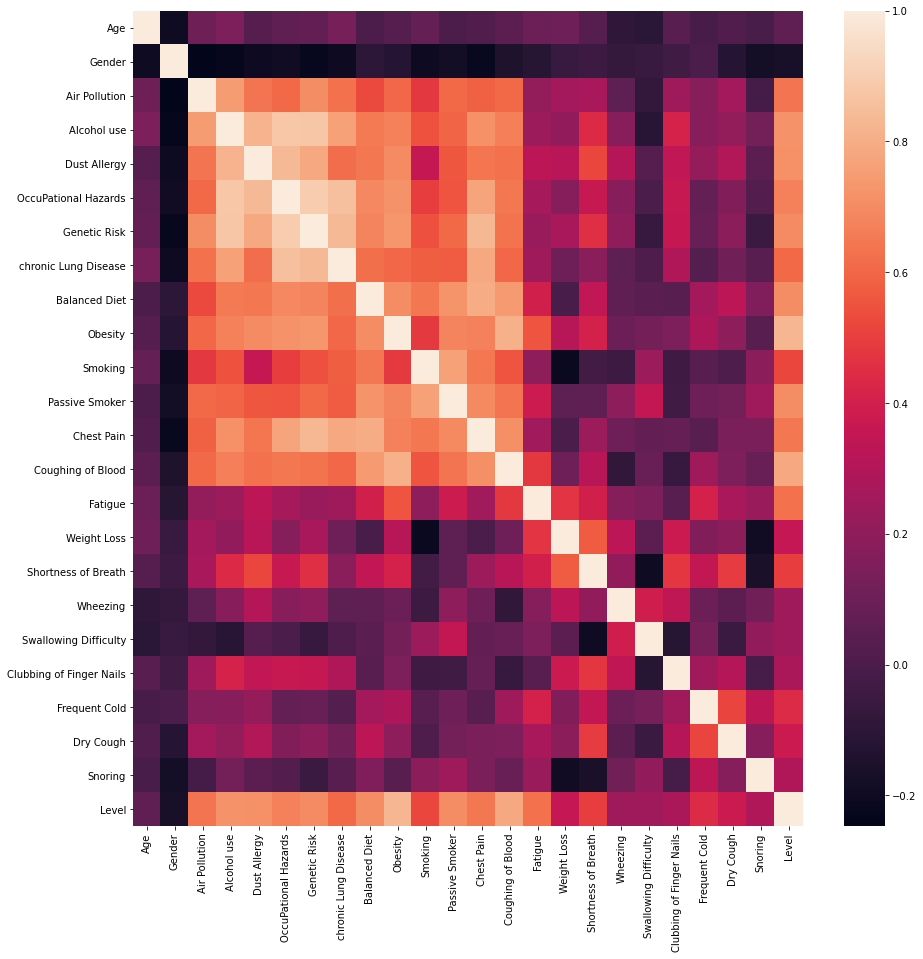

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())

# Seperate the Independent and dependent variables

In [14]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

# Splitting the Dataset into Trainning and Testing 

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)


# Feature Scalling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

# Model Base on Entropy

1. Entropy measures the impurity in the given dataset. In Physics and Mathematics, entropy is referred to as the randomness or   uncertainty of a random variable X. In information theory, it refers to the impurity in a group of examples. Information gain   is the decrease in entropy. Information gain computes the difference between entropy before split and average entropy after     split of the dataset based on given attribute values.

 Entropy is represented by the following formula:-
 

  

$\sum_{i=1}^{c}-Pi * log(Pi,base=2)$

Here, c is the number of classes and pi is the probability associated with the ith class.
The ID3 (Iterative Dichotomiser) Decision Tree algorithm uses entropy to calculate information gain.
So, by calculating decrease in entropy measure of each attribute we can calculate their information gain.
The attribute with the highest information gain is chosen as the splitting attribute at the node.

# Finding the Max Depth Value

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

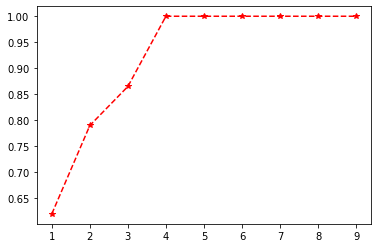

In [21]:
accuracy=[]
for i in range(1,10):
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state=0)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred))
plt.plot(range(1,10),accuracy,'--r*')   
 

# Trainning the Model`

In [23]:
 from sklearn.tree import DecisionTreeClassifier

In [22]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)

In [23]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# Prediction

In [24]:
y_predict=model.predict(X_test)

In [25]:
pd.DataFrame({"y_test":y_test,"y_pred":y_predict})

,y_test,y_pred
831,0,0
220,2,2
936,0,0
524,1,1
742,1,1
...,...,...
134,2,2
573,2,2
521,1,1
991,2,2


# Validation and Accuracy of the Model

In [26]:
from sklearn.metrics import accuracy_score ,confusion_matrix

In [27]:
accuracy_score(y_test ,y_pred)

1.0

In [28]:
confusion_matrix(y_test,y_pred)

array([[61,  0,  0],
       [ 0, 62,  0],
       [ 0,  0, 77]], dtype=int64)

# Model Base On Gini Index

1. Another attribute selection measure that CART (Categorical and Regression Trees) uses is the Gini index. It uses the Gini method to create split points.

Gini index can be represented with the following

$Gini=1-\sum_{i=1}^{c}(Pi)^{2}$

Here, again c is the number of classes and pi is the probability associated with the ith class.

Gini index says, if we randomly select two items from a population,
they must be of the same class and probability for this is 1 if the population is pure.

It works with the categorical target variable “Success” or “Failure”. 
It performs only binary splits. 
The higher the value of Gini, higher the homogeneity. CART (Classification and Regression Tree) uses the Gini method to create binary splits.

 Steps to Calculate Gini for a split

1. Calculate Gini for sub-nodes, using formula sum of the square of probability for success and failure (p^2+q^2).

2. Calculate Gini for split using weighted Gini score of each node of that split.

In case of a discrete-valued attribute, the subset that gives the minimum gini index for that chosen is selected as a splitting attribute. In the case of continuous-valued attributes, the strategy is to select each pair of adjacent values as a possible split-point and point with smaller gini index chosen as the splitting point. The attribute with minimum Gini index is chosen as the splitting attribute.

In [42]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)

In [43]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

# prediction

In [48]:
y_pred1=model2.predict(X_test)

In [49]:
accuracy_score(y_pred1,y_test)

1.0

In [50]:
confusion_matrix(y_test,y_pred1)

array([[61,  0,  0],
       [ 0, 62,  0],
       [ 0,  0, 77]], dtype=int64)

# Check for overfitting and underfitting

In [53]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model2.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model2.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 1.0000


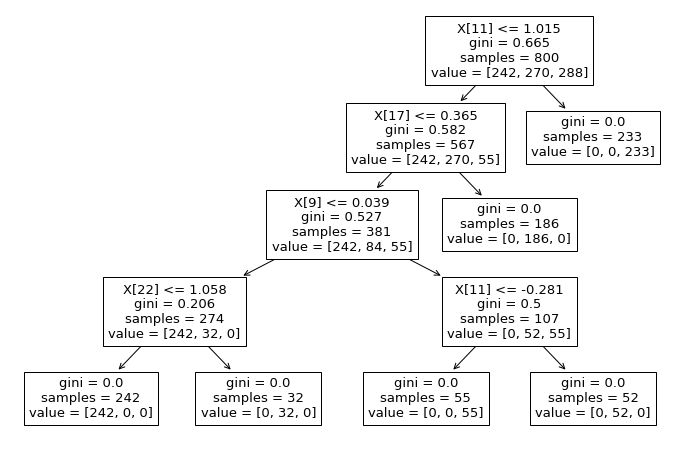

In [58]:
plt.figure(figsize=(12,8))

from sklearn.tree import plot_tree

plot_tree(model2.fit(X_train, y_train)) 
plt.show()

# Visualize decision-trees with graphviz

In [62]:
!pip install graphviz

In [14]:
df.columns[[11,17,9,22,11]]


Index(['Passive Smoker', 'Wheezing', 'Obesity', 'Snoring', 'Passive Smoker'], dtype='object')